##  Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

[2 2 2 2 2]


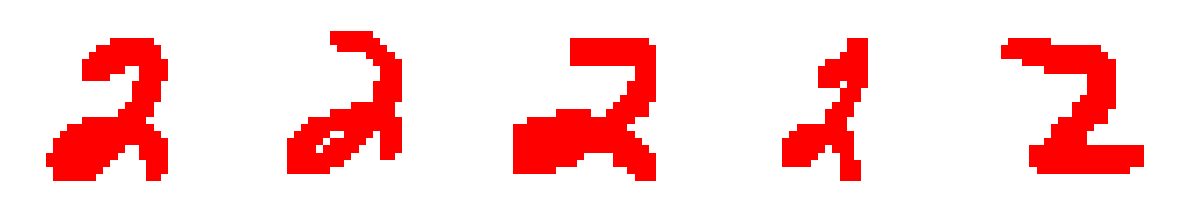

In [27]:
filename = "./training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

print(train_digits[:5])
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, image in enumerate(train_images[:5]):
    axes[i].imshow(image)  
    axes[i].axis('off')
plt.show()

# grayscale_images = np.dot(train_images[...,:3], [0.2989, 0.5870, 0.1140])
# fig, axes = plt.subplots(1, 5, figsize=(15, 3))
# for i, image in enumerate(grayscale_images[:5]):
#     axes[i].imshow(image)  
#     axes[i].axis('off')
# plt.show()

[2 2 2 2 2]


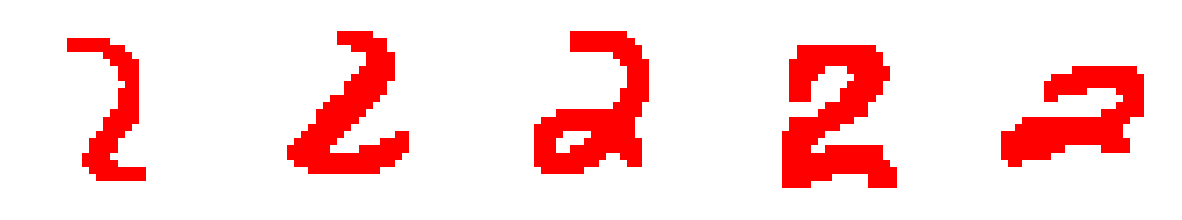

In [28]:
filename = "./testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

print(test_digits_1[:5])
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, image in enumerate(test_images_1[:5]):
    axes[i].imshow(image)  
    axes[i].axis('off')
plt.show()

[2 2 2 2 2]


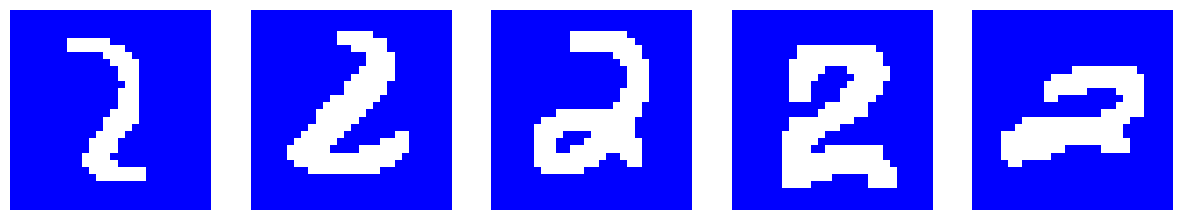

In [29]:
filename = "./testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

print(test_digits_2[:5])
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, image in enumerate(test_images_2[:5]):
    axes[i].imshow(image)  
    axes[i].axis('off')
plt.show()

# grayscale_images = np.dot(train_images[...,:3], [0.2989, 0.5870, 0.1140])
# fig, axes = plt.subplots(1, 5, figsize=(15, 3))
# for i, image in enumerate(grayscale_images[:5]):
#     axes[i].imshow(image)  
#     axes[i].axis('off')
# plt.show()

### Preprocessing

#### Case 1:

In [5]:
# red pixel as 1, white as 0
preprocessed_train_images = np.zeros_like(train_images[:, :, :, 0]) 
for i, image in enumerate(train_images):
    preprocessed_image = np.where(np.all(image == [1, 0, 0], axis=-1), 255, 0)
    preprocessed_train_images[i] = preprocessed_image  

# red pixel as 1, white as 0
preprocessed_test1_images = np.zeros_like(test_images_1[:, :, :, 0]) 
for i, image in enumerate(test_images_1):
    preprocessed_image = np.where(np.all(image == [1, 0, 0], axis=-1), 255, 0)
    preprocessed_test1_images[i] = preprocessed_image  

# blue pixel as 0, white as 1
preprocessed_test2_images = np.zeros_like(test_images_2[:, :, :, 0]) 
for i, image in enumerate(test_images_2):
    preprocessed_image = np.where(np.all(image == [0, 0, 1], axis=-1), 0, 255)
    preprocessed_test2_images[i] = preprocessed_image 

# reshape
flat_train_images = preprocessed_train_images.reshape(preprocessed_train_images.shape[0], -1) 
flat_test1_images = preprocessed_test1_images.reshape(preprocessed_test1_images.shape[0], -1)
flat_test2_images = preprocessed_test2_images.reshape(preprocessed_test2_images.shape[0], -1) 

In [18]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 128),    
    activation='relu',  
    max_iter=1000, 
    alpha=1e-3,  
    solver='adam',  
    verbose=10,  
    random_state=42, 
    learning_rate_init=0.0001, 
)

In [19]:
mlp.fit(flat_train_images, train_digits)

Iteration 1, loss = 0.80214101
Iteration 2, loss = 0.64113558
Iteration 3, loss = 0.58273957
Iteration 4, loss = 0.53990366
Iteration 5, loss = 0.50993565
Iteration 6, loss = 0.49163116
Iteration 7, loss = 0.48309152
Iteration 8, loss = 0.47907622
Iteration 9, loss = 0.47756928
Iteration 10, loss = 0.47766407
Iteration 11, loss = 0.47538796
Iteration 12, loss = 0.47991671
Iteration 13, loss = 0.47576487
Iteration 14, loss = 0.47709374
Iteration 15, loss = 0.47542341
Iteration 16, loss = 0.47514872
Iteration 17, loss = 0.47494258
Iteration 18, loss = 0.47483894
Iteration 19, loss = 0.47496900
Iteration 20, loss = 0.47457397
Iteration 21, loss = 0.47531929
Iteration 22, loss = 0.47463062
Iteration 23, loss = 0.47409063
Iteration 24, loss = 0.47481561
Iteration 25, loss = 0.47409836
Iteration 26, loss = 0.47527349
Iteration 27, loss = 0.47433759
Iteration 28, loss = 0.47516005
Iteration 29, loss = 0.47545919
Iteration 30, loss = 0.47452602
Iteration 31, loss = 0.47468526
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 128, 128), max_iter=1000,
              random_state=42, verbose=10)

In [20]:
predictions_test1 = mlp.predict(flat_test1_images)
accuracy_test1 = np.mean(predictions_test1 == test_digits_1)
print(f"Accuracy on Test Set 1: {accuracy_test1 * 100}%")

predictions_test2 = mlp.predict(flat_test2_images)
accuracy_test2 = np.mean(predictions_test2 == test_digits_2)
print(f"Accuracy on Test Set 2: {accuracy_test2 * 100}%")

Accuracy on Test Set 1: 68.8592310136638%
Accuracy on Test Set 2: 32.79313632030505%


#### Case 2:

In [87]:
mlp1 = MLPClassifier(
    hidden_layer_sizes=(128, 128, 64,128, 128),  
    activation='relu', 
    max_iter=1000,  
    alpha=1e-4,  
    solver='adam',   
    random_state=42,  
    learning_rate_init=0.0001,
)

In [88]:
flat_train_images1 = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255.
flat_test1_images1 = test_images_1.reshape(test_images_1.shape[0], -1).astype('float32') / 255.
flat_test2_images1 = test_images_2.reshape(test_images_2.shape[0], -1).astype('float32') / 255. 

In [89]:
mlp1.fit(flat_train_images1, train_digits)

MLPClassifier(hidden_layer_sizes=(128, 128, 64, 128, 128),
              learning_rate_init=0.0001, max_iter=1000, random_state=42)

In [90]:
predictions_test1 = mlp1.predict(flat_test1_images1)
accuracy_test1 = np.mean(predictions_test1 == test_digits_1)
print(f"Accuracy on Test Set 1: {accuracy_test1 * 100}%")

predictions_test2 = mlp1.predict(flat_test2_images1)
accuracy_test2 = np.mean(predictions_test2 == test_digits_2)
print(f"Accuracy on Test Set 2: {accuracy_test2 * 100}%")

Accuracy on Test Set 1: 99.96822370511599%
Accuracy on Test Set 2: 1.6523673339688592%


### Observations

1. I am getting accuracy of 68.8592310136638% on test-set-1 when I am preprocessing in the following way
    - replacing pixel with [1. 1. 1.] that is white with 0
    - replacing pixel with [1. 0. 0.] that is white with 1
    - thus pixel giving us the value of 1 of digit pixel or else 0
    - passing a (784) length vector for each image 

2. I am getting accuracy of 32.79313632030505% on test-set-2 when I am preprocessing in the following way, which is not good way
    - replacing pixel with [1. 1. 1.] that is white with 1
    - replacing pixel with [0. 0. 1.] that is white with 0
    - thus pixel giving us the value of 1 of digit pixel or else 0
    - passing a (784) length vector for each image 
    - But its not reccomended to do different preprocessing on test set

3.  I am getting accuracy of 99.96822370511599% on test-set-1 when I am preprocessing in the following way
    - passing a (2352) length vector for each image that is just flatting the original image embedings

4.  I am getting accuracy of 1.6523673339688592% on test-set-2 when I am preprocessing in the following way
    - passing a (2352) length vector for each image that is just flatting the original image embedings

- converting into grey scale also will not work very well in test-case-2

- in 4th case model is behaving such a way because the way model train is on the digit being the red or the dark intensity pixel but the test data is giving completely different results. which is totally unseen and new to the model, thus giving an accuracy of 1.6523673339688592%